In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
# import and print head of data set
df = pd.read_csv('tennis_stats.csv')
df.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


In [4]:
df.columns

Index(['Player', 'Year', 'FirstServe', 'FirstServePointsWon',
       'FirstServeReturnPointsWon', 'SecondServePointsWon',
       'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted',
       'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved',
       'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon',
       'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon',
       'TotalPointsWon', 'TotalServicePointsWon', 'Wins', 'Losses', 'Winnings',
       'Ranking'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon        1721 non-null   float64
 6   SecondServeReturnPointsWon  1721 non-null   float64
 7   Aces                        1721 non-null   int64  
 8   BreakPointsConverted        1721 non-null   float64
 9   BreakPointsFaced            1721 non-null   int64  
 10  BreakPointsOpportunities    1721 non-null   int64  
 11  BreakPointsSaved            1721 non-null   float64
 12  DoubleFaults                1721 non-null   int64  
 13  ReturnGamesPlayed           1721 

In [6]:
service_game_columns_offensive = ['Aces', 'DoubleFaults', 'FirstServe', 'FirstServePointsWon', 'SecondServePointsWon', 'BreakPointsFaced','BreakPointsSaved', 'ServiceGamesPlayed', 'ServiceGamesWon', 'TotalServicePointsWon' ]

return_game_columns_defensive = ['FirstServeReturnPointsWon', 'SecondServeReturnPointsWon', 'BreakPointsOpportunities', 'BreakPointsConverted', 'ReturnGamesPlayed', 'ReturnGamesWon', 'ReturnPointsWon', 'TotalPointsWon']

outcomes = ['Wins', 'Losses', 'Winnings', 'Ranking']

# for outcome in outcomes:
#     for service_game_column in service_game_columns_offensive:
#         plt.scatter(df[outcome], df[service_game_column], alpha=0.4)
#         plt.title(outcome + ' v ' + service_game_column)
#         plt.xlabel(outcome)
#         plt.ylabel(service_game_column)
#         plt.show()
#     for return_game_column in return_game_columns_defensive:
#         plt.scatter(df[outcome], df[return_game_column], alpha=0.4)
#         plt.title(outcome + ' v ' + return_game_column)
#         plt.xlabel(outcome)
#         plt.ylabel(return_game_column)
#         plt.show()



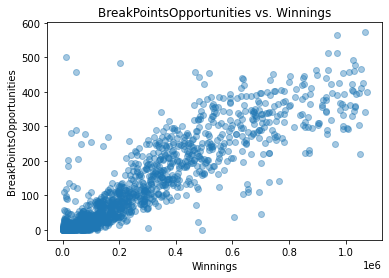

In [8]:
plt.scatter(df.Winnings, df.BreakPointsOpportunities, alpha=0.4)
plt.xlabel("Winnings")
plt.ylabel('BreakPointsOpportunities')
plt.title('BreakPointsOpportunities vs. Winnings')
plt.show()

In [9]:
# setup linear regression model
features = df[['FirstServeReturnPointsWon']]
outcome = df[['Winnings']]

In [10]:
# break data into training and test/val sets
features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, train_size=0.8)

In [11]:
# Create linear regression model and train it on the training data.
model = LinearRegression()
model.fit(features_train, outcome_train)

LinearRegression()

In [12]:
# score the model
model.score(features_test, outcome_test)

0.07365425729495856

In [13]:
# Calculate predicted outome
predicted = model.predict(features_test)

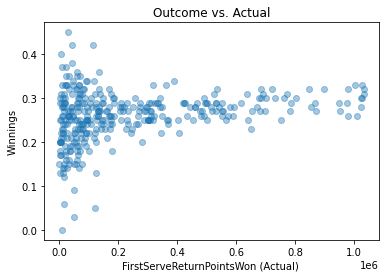

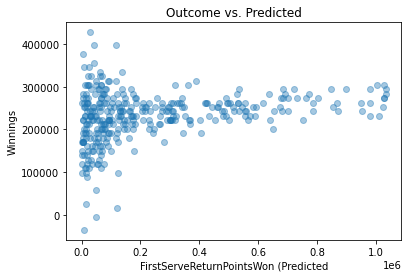

In [16]:
## Plot it
# Actual
plt.scatter(outcome_test, features_test, alpha=0.4)
plt.title('Outcome vs. Actual')
plt.xlabel('FirstServeReturnPointsWon (Actual) ')
plt.ylabel('Winnings')
plt.show()

# Predicted
plt.scatter(outcome_test, predicted, alpha=0.4)
plt.title('Outcome vs. Predicted')
plt.xlabel('FirstServeReturnPointsWon (Predicted')
plt.ylabel('Winnings')
plt.show()

In [17]:
# Try a different feature
bpo = df[['BreakPointsOpportunities']]
outcome = df[['Winnings']]

In [19]:
## Create different training/val sets.
bpo_train, bpo_test, outcome_train, outcome_test = train_test_split(bpo, outcome, train_size=0.8)

In [20]:
## Create the model and "fit" it by training it on the created train/val sets
bpo_model = LinearRegression()
bpo_model.fit(bpo_train, outcome_train)

LinearRegression()

In [21]:
## Create a score
bpo_model.score(bpo_test, outcome_test)

0.7862151816661479

In [24]:
# Predict
bpo_predicted = bpo_model.predict(bpo_test)

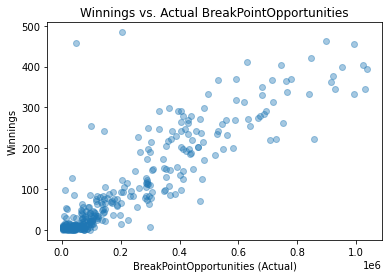

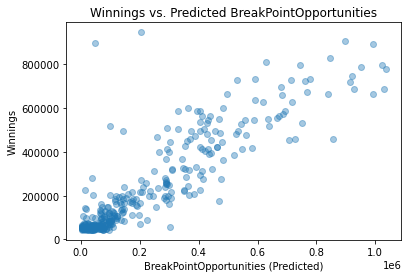

In [25]:
# Plot Actual and Non Actual
plt.scatter(outcome_test, bpo_test, alpha=0.4)
plt.title('Winnings vs. Actual BreakPointOpportunities')
plt.xlabel('BreakPointOpportunities (Actual)')
plt.ylabel('Winnings')
plt.show()

plt.scatter(outcome_test, bpo_predicted, alpha=0.4)
plt.title('Winnings vs. Predicted BreakPointOpportunities')
plt.xlabel('BreakPointOpportunities (Predicted)')
plt.ylabel('Winnings')
plt.show()

In [26]:
# Repeat Steps w/ multiple features

mult_features = df[['BreakPointsOpportunities', 'FirstServeReturnPointsWon']]
outcome = df[['Winnings']]

# Create Training Data
mf_train, mf_test, outcome_train, outcome_test = train_test_split(mult_features, outcome, train_size=0.8)

# build model
mf_model = LinearRegression()
mf_model.fit(mf_train, outcome_train)

LinearRegression()

In [27]:
# Score that shit
mf_model.score(mf_test, outcome_test)

0.8244348115671303

In [ ]:
# Predict and plot
mf_predicted = mf_model.predict(mf_test)

plt.scatter()